In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -v -p matplotlib,pandas,mlxtend

Sebastian Raschka 
Last updated: 

CPython 3.4.3
IPython 3.1.0

matplotlib 1.4.3
pandas 0.16.0
mlxtend 0.2.0


# Enrichment Plots

In [10]:
import pandas as pd
s1 = [1.1, 1.5]
s2 = [2.1, 1.8]
s3 = [3.1, 2.1]
s4 = [3.9, 2.5]
data = [s1, s2, s3, s4]
df = pd.DataFrame(data, columns=['X1', 'X2'])
df

,X1,X2
0,1.1,1.5
1,2.1,1.8
2,3.1,2.1
3,3.9,2.5


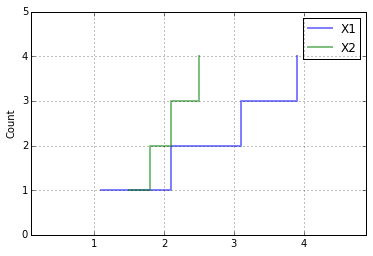

In [11]:
%matplotlib inline
from mlxtend.matplotlib import enrichment_plot
enrichment_plot(df)

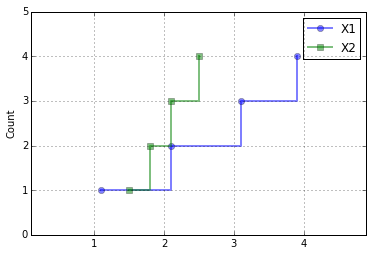

In [12]:
enrichment_plot(df, markers='os', ylim=[0,5])

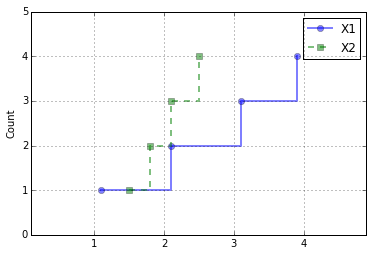

In [13]:
enrichment_plot(df, markers='os', linestyles='-,--')

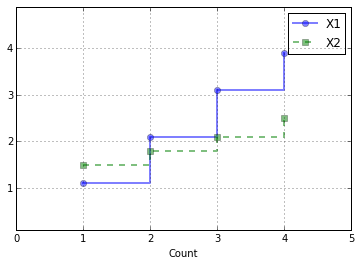

In [14]:
enrichment_plot(df, markers='os', linestyles='-,--', invert_axes=True)